###Finding Optimal House Rent
Submitted By:

Name: Prateek Kumar

Register Number: 2248013

Class: 2 MSc Data Science

## Lab Overview
### Background

You are working in the Lavasa Campus, helping our Public Relations Team to find houses for people who are in search for one.
You currently have the dataset that shows the Building Type, Location, Size, Building Area, No of Bathrooms, No of Balconies and how many people stayed in the building in the academic year 2020-21. This dataset also shows you the rent that is demanded by the current building owners.


Management has contacted you to get an idea about the rent of the accomodation facilities as available there. You, being an amazing analyst, is very confident that you will be able to help him with the requirements that he has.
Below are some suggestions that:

--1 BHK with 2 Baths in Portofino Street

--A Fully-Furnished 2 BHK Room, in School Street

--A Super-Furnished Single Room, anywhere in Lavasa

--A Fully-Furnished 2 BHK Room with two balconies

# Question
You started by considering 70% of Data for Training and 30% for testing.Seeing you do the training and testing for predicting house values, asks you few doubts.

What happens if you use different Random States for splitting the dataset before the training process?

Is there any improvement in the Reduction of Training and Generalization Errors if you increase the percentage of Training to 80% and 90%?

What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?

During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

# Objective
Get familiar with the problem statement, Know the dataset thoroghly, Analyse the given dataset by exploring the hidden insights with beautiful visuals and Train & Test the model for acurate rental pridiction using simple linear regression.

#Problem Definition
Understand the Dataset & Features.

Perform Data Preprocessing Technique to Get Balanced Structured Data.

Perform Statistical Data Analysis and Derive Valuable Inferences.

Perform Exploratory Data Analysis and Derive Valuable Insights.

Train and Test through Different Regression Models for Better Pricdiction.

#Approach

Step 1: Know the dataset thoroughly.

Step 2: Perform preprocessing on data.

Step 3: Import needfull libraries as an when you try to plot different graphs and evaluate the model.

Step 4: Perform Statistical Data Analysis and Derive Valuable Inferences.

Step 5: Perform Exploratory Data Analysis and Derive Valuable Insights.

Step 6: Train and Test through Different Regression Models for Better Prediction.


#Overview
Dataset Overview

Data Analyst Process

About Different Regression Models

Implementation and Evaluation of Different Regression Models

Conclusion

#References
https://pandas.pydata.org/

https://matplotlib.org/

https://seaborn.pydata.org/

https://plotly.com/

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

# Dataset Overview

The dataset shows theBuilding Type - Is it a fully/semi/Un furnished Single Room, Flat, or Villa ?

Location - Where is the property located?

Size - Is it 1BHK, 2BHK, 3BHK ?

AreaSqFt - How much big is the property ?

No of Bath - How many bathrooms in the property?

No of Balcony - How many balconies in the property?

No of People - How many people stayed in the building in the academic year 2020-21.

RentPerMonth - Rent to be paid per month which is demanded by the current building owners.

**ASSUMPTION:**

Linearity: The relationship between the independent and dependent variables should be linear.

Homoscedasticity: The variance of the errors should be constant across all values of the independent variables.

Normality: To check whether the dependent variable as well independent variable follows a normal distribution.

Import the required library.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Loading the Datasets in Google colab

In [2]:
from google.colab import files

uploaded = files.upload()

Saving HousePrices - Lab3.csv to HousePrices - Lab3.csv


Creating the dataframe to read the dataset

In [3]:
df = pd.read_csv("HousePrices - Lab3.csv")

In [4]:
df.columns #Displays the column names.

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

In [5]:
df.shape #Displays the rows and column count


(1000, 8)

In [6]:
df.head() #Displays the first 5 rows by default.

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [7]:
df.tail() #Displays the last 5 rows by default.

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0
999,Super Furnished Villa,Portofino B,7 BHK,6300.0,6,6,3,96000.0


In [8]:
df['NoOfRoom'] = df['Size'].apply(lambda x: int(x.split(' ')[0]))
df.NoOfRoom.unique()

array([1, 2, 3, 4, 5, 6, 8, 7, 9])

In [9]:
df['RentPerPerson'] = df['RentPerMonth'] / df['NoOfPeople']

In [10]:
df.info() #Gives the detail information about the dataset, features, dtypes, memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BuildingType   1000 non-null   object 
 1   Location       1000 non-null   object 
 2   Size           1000 non-null   object 
 3   AreaSqFt       1000 non-null   float64
 4   NoOfBath       1000 non-null   int64  
 5   NoOfPeople     1000 non-null   int64  
 6   NoOfBalcony    1000 non-null   int64  
 7   RentPerMonth   1000 non-null   float64
 8   NoOfRoom       1000 non-null   int64  
 9   RentPerPerson  1000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [11]:
df.describe() #Displays the 5 parameter statistical summary [Count, Mean, Standard 

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth,NoOfRoom,RentPerPerson
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500,2.767000,4424.255417
std,1345.141175,1.247251,0.959529,0.838312,10509.508971,1.193371,2380.065887
min,375.000000,1.000000,1.000000,0.000000,1100.000000,1.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000,2.000000,2800.000000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000,3.000000,3915.750000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000,3.000000,5200.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000,9.000000,25000.000000


Checking the missing values through plots

In [12]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['Variables','Missing values in percentage']

fig = px.imshow(df.isnull().T, template = 'ggplot2')
fig.update_layout(title = 'Missing Values In Dataset')
fig.show()

Checking the sum of missing values in the dataset

In [13]:
print("Missing Values\n\n",df.isnull().sum())

Missing Values

 BuildingType     0
Location         0
Size             0
AreaSqFt         0
NoOfBath         0
NoOfPeople       0
NoOfBalcony      0
RentPerMonth     0
NoOfRoom         0
RentPerPerson    0
dtype: int64


Display the column available in the datasets

In [14]:
display(df[['BuildingType','Location','Size','NoOfBath','NoOfBalcony','NoOfPeople','NoOfRoom','RentPerMonth','RentPerPerson']].groupby(['BuildingType','Location','Size']))

Percentage of the counts of building type in dataset

In [15]:
def percentage(df):
    number = pd.DataFrame(df.value_counts())
    number.columns = ['Total']
    number['%'] = round((number['Total'] / df.notnull().sum()) * 100, 1)
    return number

In [16]:
percentage(df["BuildingType"])

,Total,%
Semi Furnished Single Room,274,27.4
Semi Furnished Flat,246,24.6
Fully Furnished Single Room,153,15.3
Minimum Budget Rooms,146,14.6
Semi Furnished Villa,63,6.3
Fully Furnished Flat,41,4.1
Super Furnished Single Room,25,2.5
Super Furnished Villa,21,2.1
Fully Furnished Villa,19,1.9
Super Furnished Flat,12,1.2


Plotting the building type using sns plot

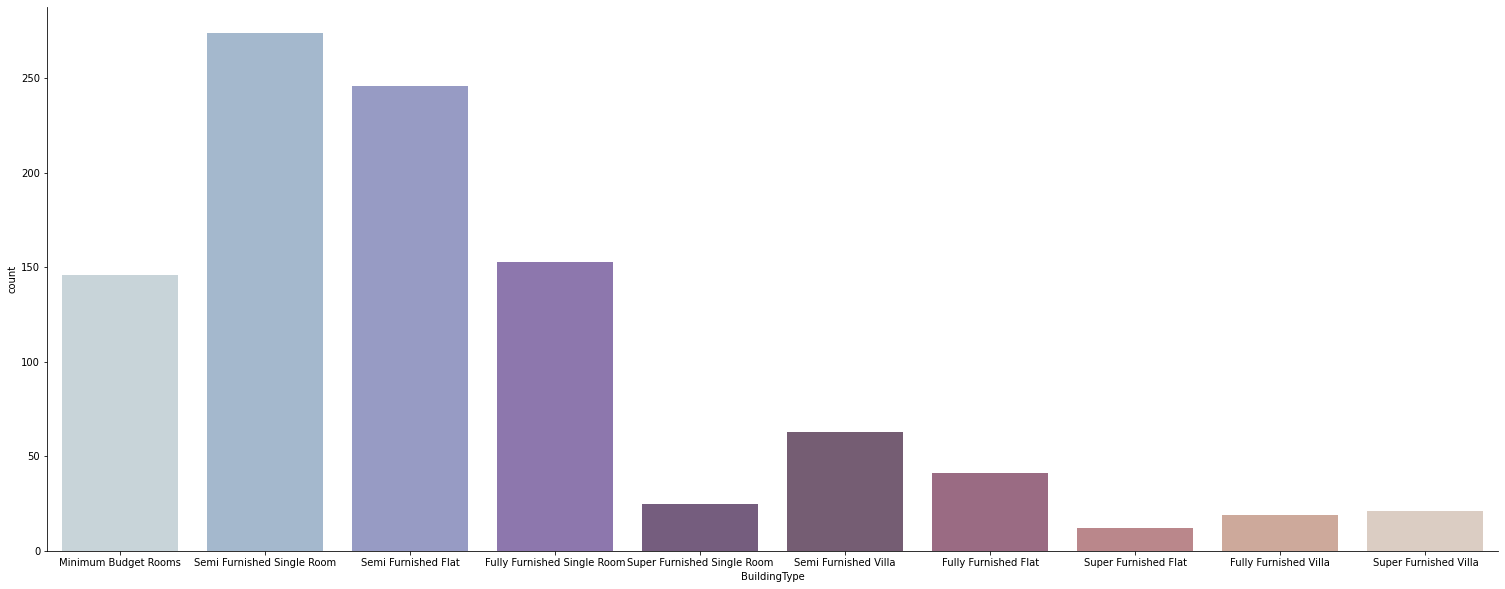

In [17]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [18]:
Pie = df['BuildingType'].value_counts().reset_index()
Pie.columns = ['BuildingType','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'BuildingType', values = 'Percent', title = 'BuildingType', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

In [82]:
# Percentage of Location of building type
percentage(df["Location"])

,Total,%
Clubview Road,213,21.3
Portofino B,173,17.3
School Street,138,13.8
Portofino D,105,10.5
Portofino C,103,10.3
Portofino A,95,9.5
Portofino H,62,6.2
Portofino E,54,5.4
Portofino G,26,2.6
Portofino F,22,2.2


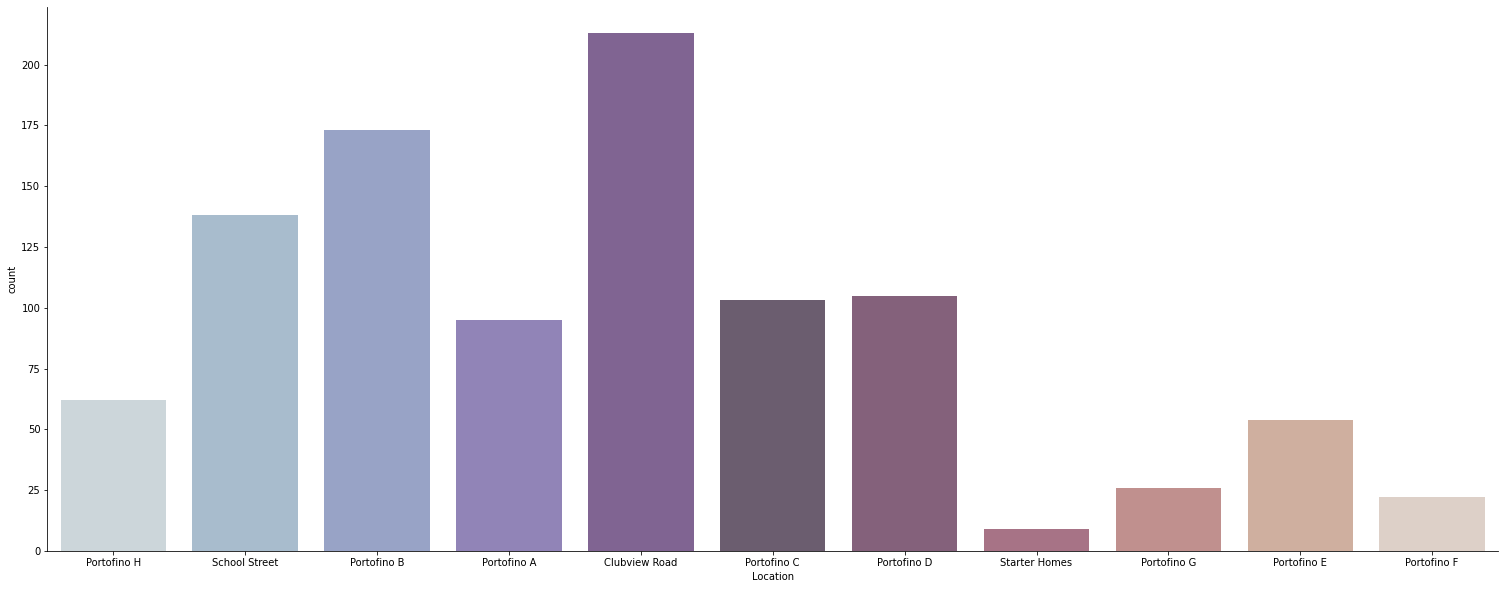

In [20]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'Location', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [21]:
# Plot the location in the Pie charts
Pie = df['Location'].value_counts().reset_index()
Pie.columns = ['Location','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Location', values = 'Percent', title = 'Location', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()


In [81]:
# calculating the % of size 
percentage(df["Size"])

,Total,%
2 BHK,429,42.9
3 BHK,353,35.3
4 BHK,103,10.3
1 BHK,51,5.1
5 BHK,22,2.2
6 BHK,21,2.1
8 BHK,8,0.8
7 BHK,7,0.7
9 BHK,4,0.4
1 RK,2,0.2


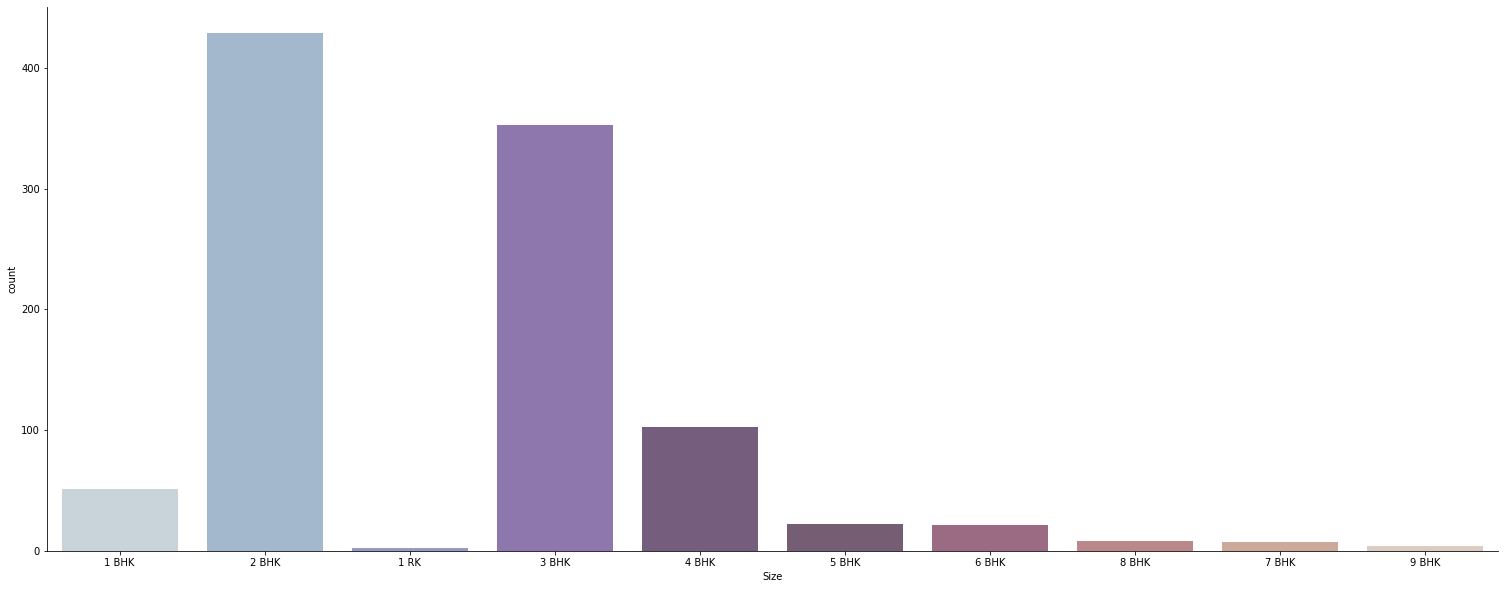

In [23]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'Size', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [24]:
Pie = df['Size'].value_counts().reset_index()
Pie.columns = ['Size','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'Size', values = 'Percent', title = 'Size', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()

In [25]:
percentage(df["NoOfBath"])

,Total,%
2,514,51.4
3,252,25.2
4,95,9.5
1,68,6.8
5,35,3.5
6,16,1.6
7,10,1.0
9,5,0.5
8,4,0.4
11,1,0.1


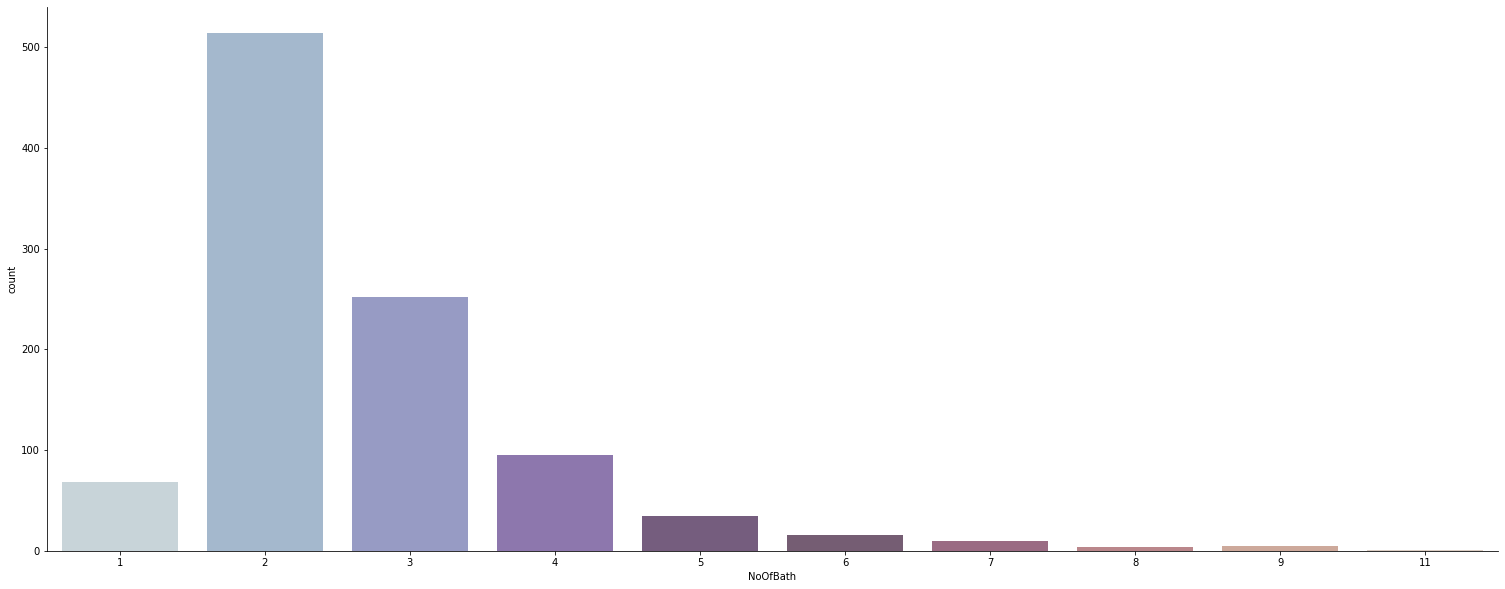

In [26]:
Pie = df['NoOfBath'].value_counts().reset_index()
Pie.columns = ['NoOfBath','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfBath', values = 'Percent', title = 'NoOfBath', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfBath', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [27]:
percentage(df["NoOfPeople"])

,Total,%
2,574,57.4
1,192,19.2
3,165,16.5
4,27,2.7
5,27,2.7
6,15,1.5


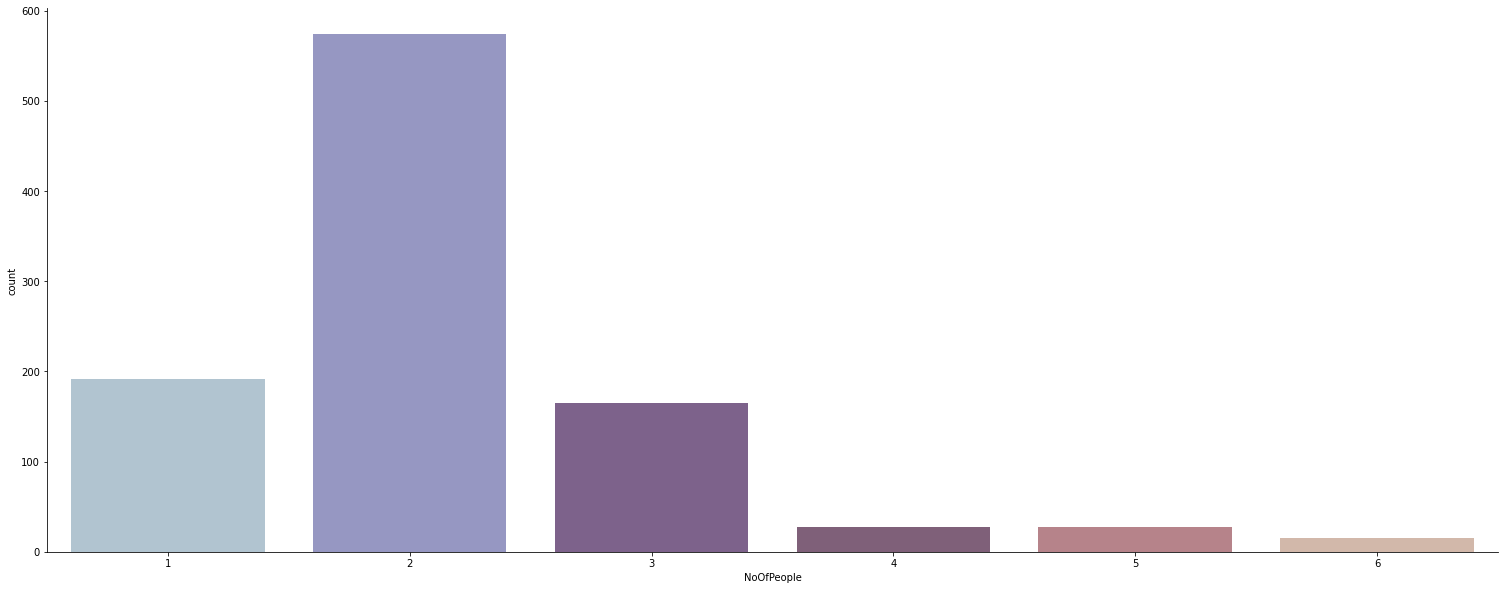

In [28]:
Pie = df['NoOfPeople'].value_counts().reset_index()
Pie.columns = ['NoOfPeople','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfPeople', values = 'Percent', title = 'NoOfPeople', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfPeople', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

In [29]:
percentage(df["NoOfBalcony"])

,Total,%
2,393,39.3
1,380,38.0
3,126,12.6
0,101,10.1


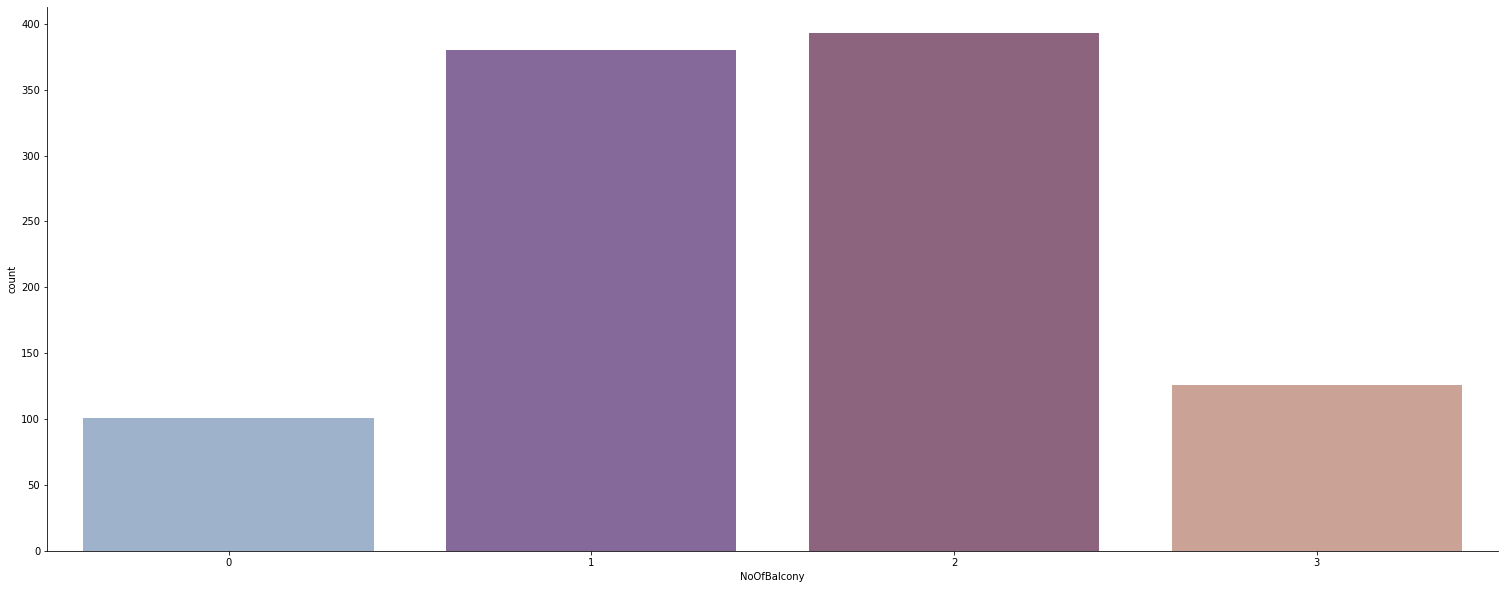

In [30]:
Pie = df['NoOfBalcony'].value_counts().reset_index()
Pie.columns = ['NoOfBalcony','Percent']
Pie['Percent'] /= len(df)

fig = px.pie(Pie, names = 'NoOfBalcony', values = 'Percent', title = 'NoOfBalcony', color = "Percent", color_discrete_sequence = px.colors.sequential.RdBu)

fig.show()
plt.figure(figsize = [26,10])
sns.countplot(x = 'NoOfBalcony', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

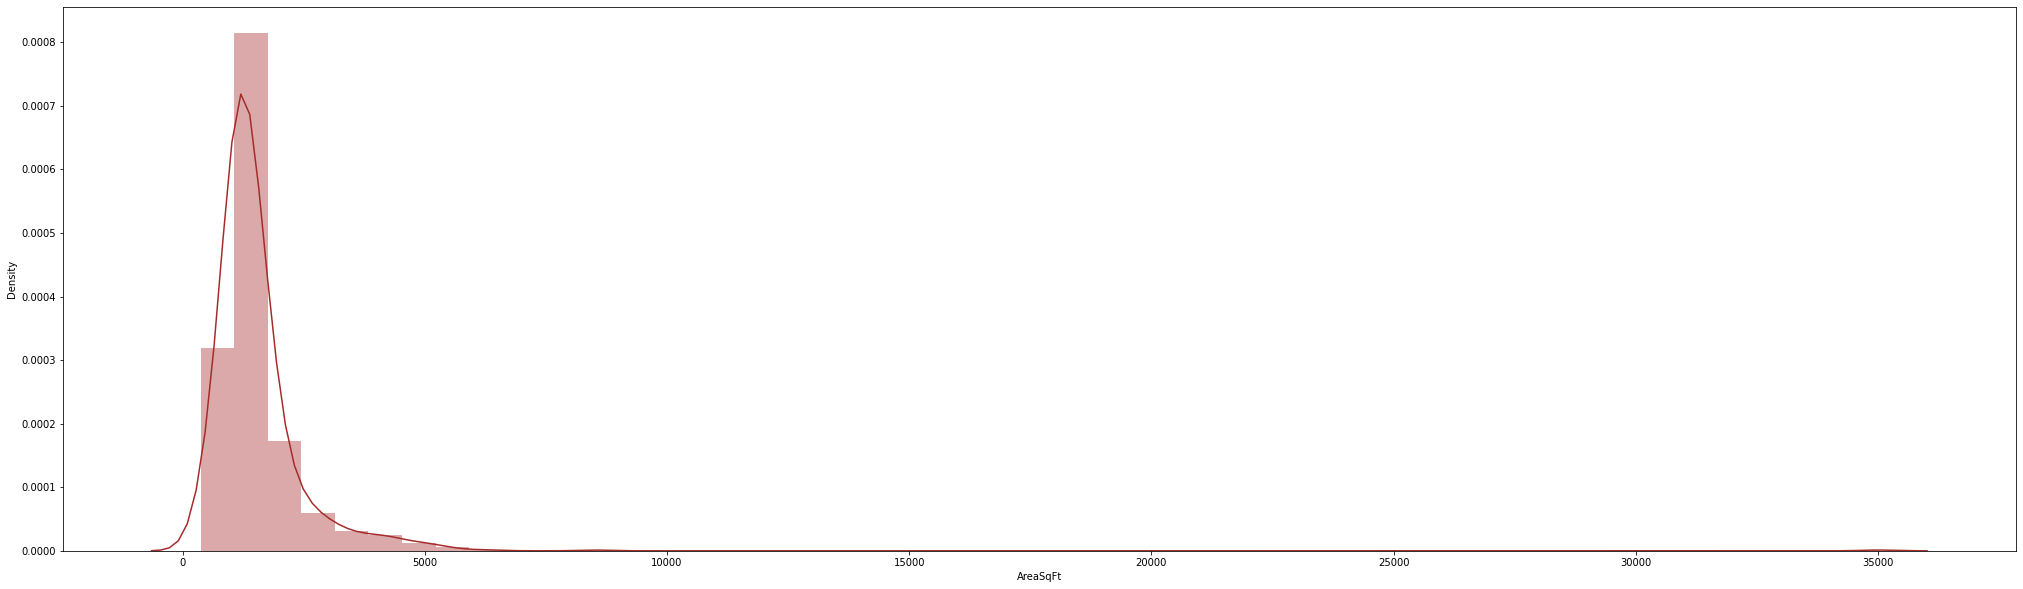

In [31]:
plt.figure(figsize=(35,10))
sns.distplot(df['AreaSqFt'], color = 'brown')

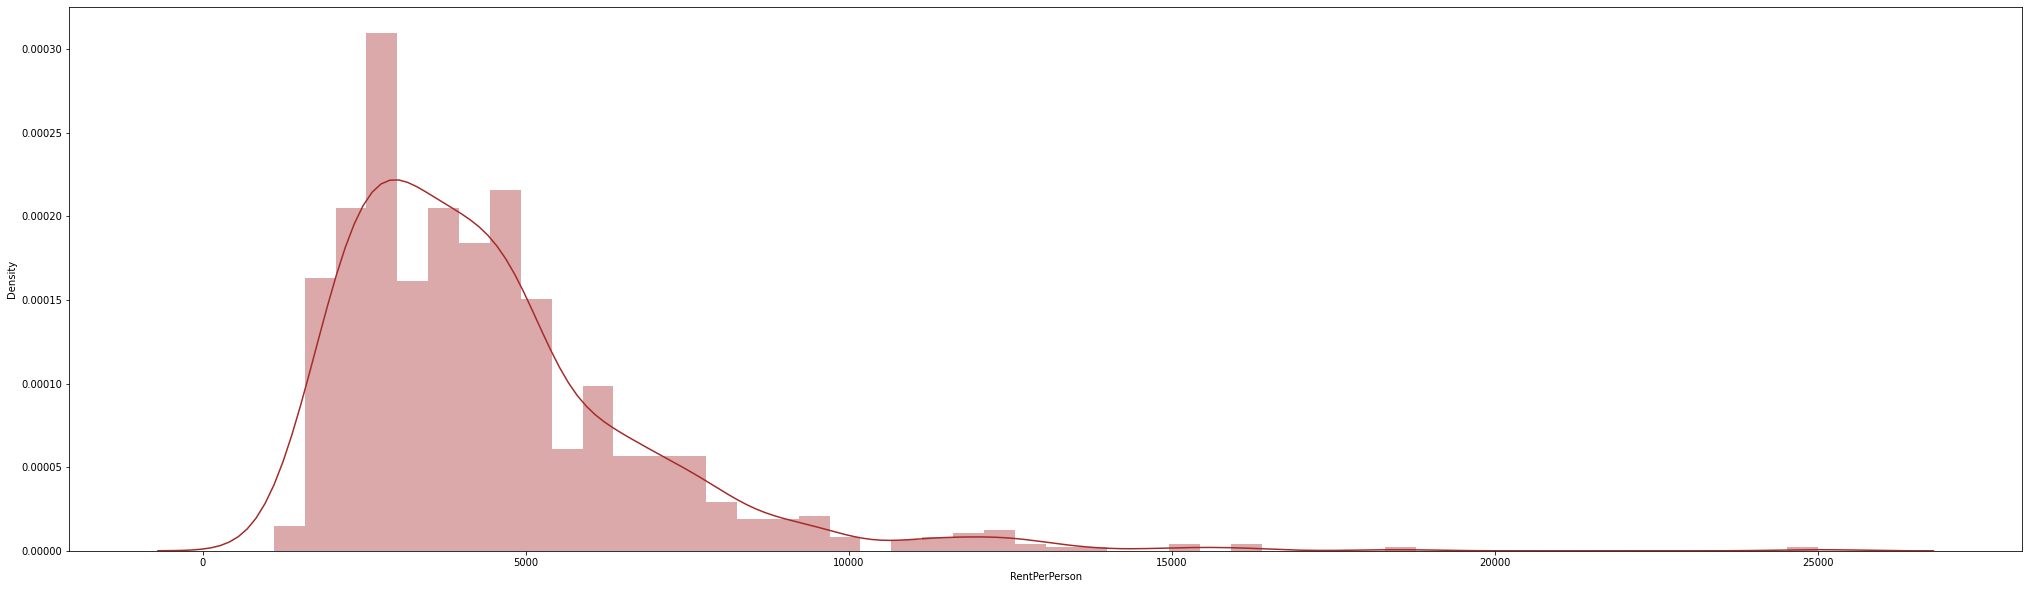

In [32]:
plt.figure(figsize=(35,10))
sns.distplot(df['RentPerPerson'], color = 'brown')

Sorting the Property by RentperMonth in asecnding order

In [33]:
df.sort_values(by="RentPerMonth", ascending = False).head(10)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth,NoOfRoom,RentPerPerson
999,Super Furnished Villa,Portofino B,7 BHK,6300.0,6,6,3,96000.0,7,16000.000000
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0,6,15000.000000
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0,4,16000.000000
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0,4,15200.000000
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0,4,11666.666667
994,Super Furnished Villa,Portofino C,3 BHK,3761.0,3,6,2,66000.0,3,11000.000000
993,Super Furnished Villa,Portofino F,3 BHK,4000.0,3,6,1,66000.0,3,11000.000000
992,Super Furnished Villa,Portofino D,4 BHK,5700.0,5,5,3,65000.0,4,13000.000000
991,Super Furnished Villa,Clubview Road,4 BHK,2400.0,4,5,1,64000.0,4,12800.000000
990,Super Furnished Villa,Portofino C,4 BHK,5500.0,4,5,3,60000.0,4,12000.000000


Sorting the property using the RentPerMonth Columns

In [34]:
df.sort_values(by="RentPerMonth", ascending = True).head(10)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth,NoOfRoom,RentPerPerson
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0,1,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0,1,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0,2,1500.0
5,Minimum Budget Rooms,Portofino A,1 BHK,600.0,1,1,1,1500.0,1,1500.0
6,Semi Furnished Single Room,School Street,1 BHK,654.0,1,1,0,1513.5,1,1513.5
7,Semi Furnished Single Room,School Street,1 BHK,645.0,1,1,1,1645.0,1,1645.0
8,Semi Furnished Single Room,School Street,1 BHK,645.0,1,1,1,1645.0,1,1645.0
9,Semi Furnished Single Room,Clubview Road,2 BHK,880.0,1,1,1,1650.0,2,1650.0


In [35]:
df.corr()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth,NoOfRoom,RentPerPerson
AreaSqFt,1.000000,0.375791,0.374907,0.206123,0.473022,0.323179,0.428162
NoOfBath,0.375791,1.000000,0.480063,0.258885,0.579693,0.885717,0.599787
NoOfPeople,0.374907,0.480063,1.000000,0.184932,0.782853,0.436341,0.387843
NoOfBalcony,0.206123,0.258885,0.184932,1.000000,0.193619,0.238891,0.197620
RentPerMonth,0.473022,0.579693,0.782853,0.193619,1.000000,0.519826,0.808164
NoOfRoom,0.323179,0.885717,0.436341,0.238891,0.519826,1.000000,0.553220
RentPerPerson,0.428162,0.599787,0.387843,0.197620,0.808164,0.553220,1.000000


Correlation Plot 

Text(0.5, 1.0, 'Correlation betwn')

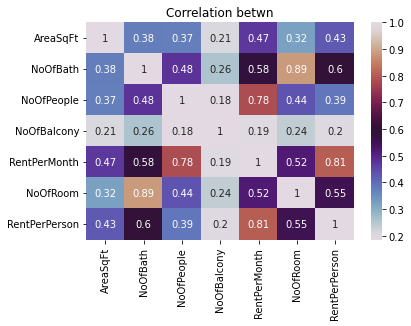

In [36]:
sns.heatmap(df.corr(), annot = True, cmap = "twilight").set_title("Correlation betwn")

Seaborn Plot to check the variation of dataset

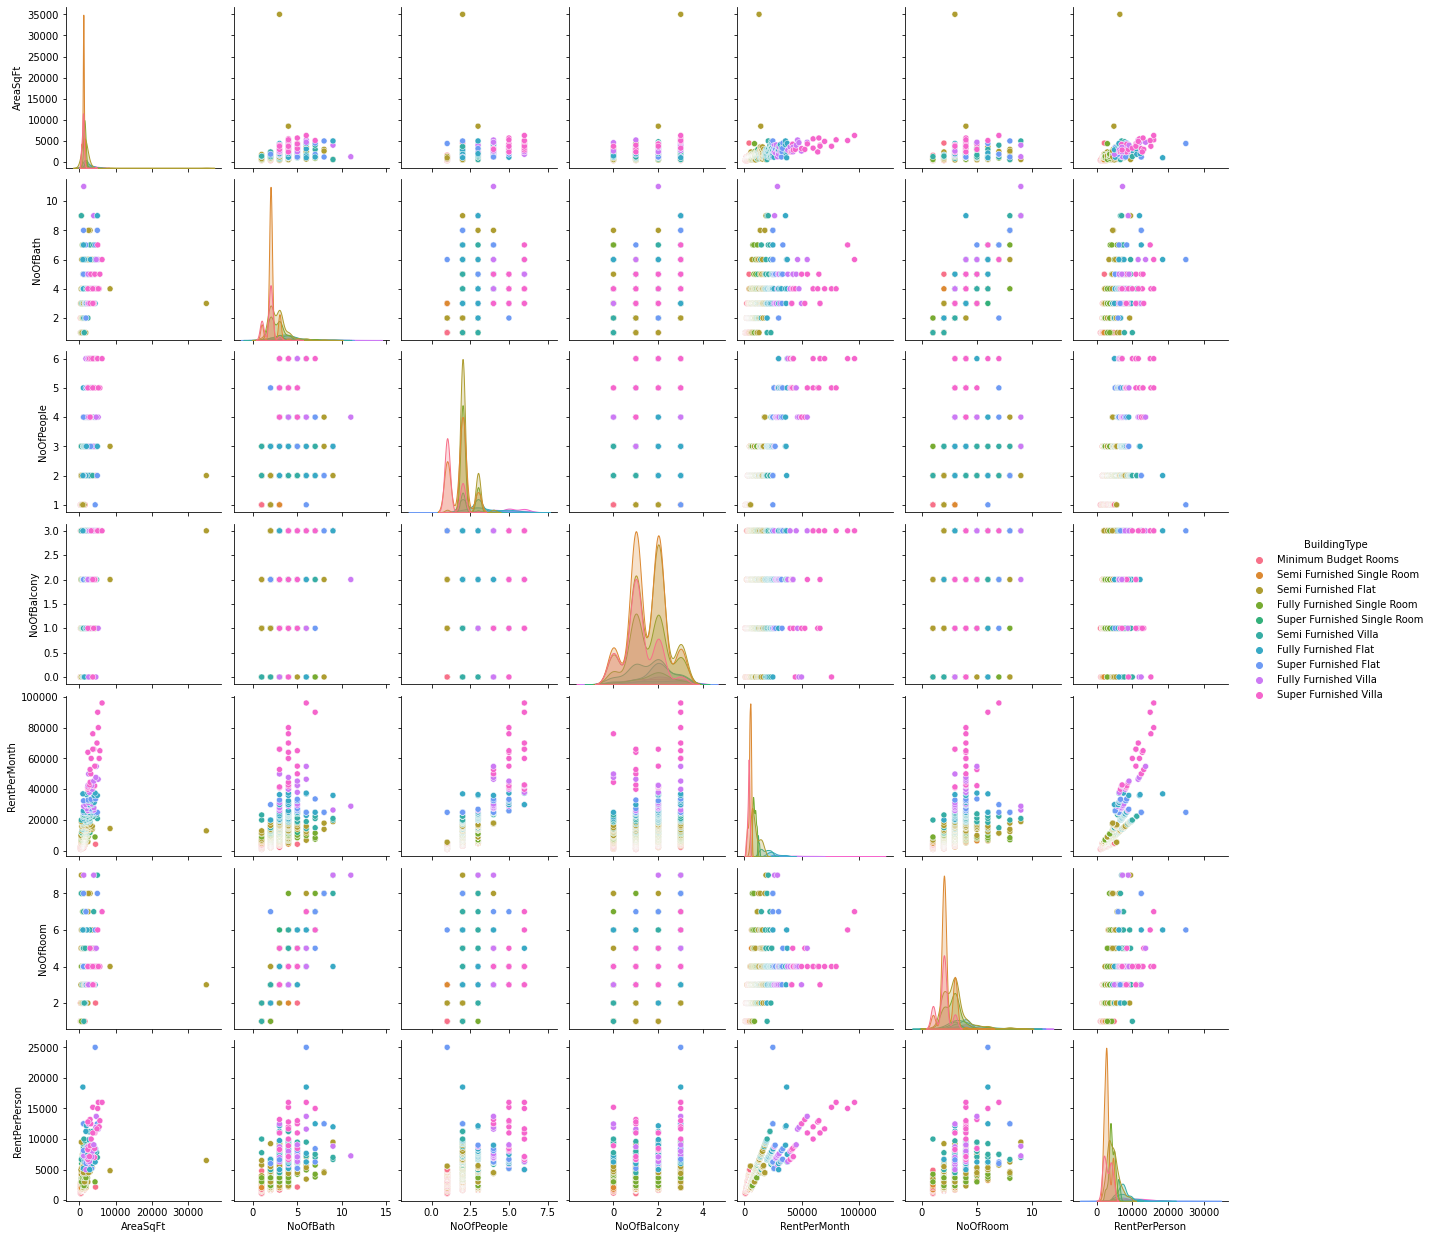

In [37]:
sns.set_palette("Spectral")
sns.pairplot(df, hue = 'BuildingType')

X variable as RentPerPerson

Y variable as RentPerMonth

In [83]:
X = df[['RentPerPerson']]
y = df['RentPerMonth']

**Regression Models Implementation and Evaluation with 70:30 Split**

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Printing the X_train and X_test shape of dataset

In [85]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (700, 1)
Shape of X_test:  (300, 1)
Shape of y_train:  (700,)
Shape of y_test (300,)


Importing the metrics and Cross Validation Score 

In [86]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

**Preparing Data For Regression**

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
LinearRegression(normalize=True)
print("Intercept:",lin_reg.intercept_)

Intercept: 10308.497857142856


In [89]:
coefficient_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficient_df

,Coefficient
RentPerPerson,8084.832721


In [90]:
pred = lin_reg.predict(X_test)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3791.844310758842
MSE: 44616734.52000573
RMSE: 6679.575923665045
R2 Square 0.6583603390019015
__________________________________
Train set evaluation:
_____________________________________
MAE: 3524.6726197653165
MSE: 36199194.97510098
RMSE: 6016.576682391822
R2 Square 0.643581421410855
__________________________________


In [91]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3791.844311,4.461673e+07,6679.575924,0.65836,-110.55782


**Ridge Regression**

In [92]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3738.041701410439
MSE: 49560373.955393225
RMSE: 7039.9129224297385
R2 Square 0.620505858637694
__________________________________
Train set evaluation:
_____________________________________
MAE: 3364.5403003779147
MSE: 37220515.60218081
RMSE: 6100.861873717582
R2 Square 0.6335254617013103
__________________________________


In [93]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3791.844311,4.461673e+07,6679.575924,0.658360,-110.55782
1,Ridge Regression,3738.041701,4.956037e+07,7039.912922,0.620506,-110.55782


**Lasso Regression**

In [94]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              #warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3791.8346838321368
MSE: 44617141.10901756
RMSE: 6679.60635883714
R2 Square 0.658357225664862
__________________________________
Train set evaluation:
_____________________________________
MAE: 3524.650628756797
MSE: 36199194.98510099
RMSE: 6016.57668322286
R2 Square 0.6435814213123945
__________________________________


In [95]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3791.844311,4.461673e+07,6679.575924,0.658360,-110.557820
1,Ridge Regression,3738.041701,4.956037e+07,7039.912922,0.620506,-110.557820
2,Lasso Regression,3791.834684,4.461714e+07,6679.606359,0.658357,-110.557813


In [96]:
X_train.astype(int)

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 3],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],

In [97]:



y_train.astype(int)

541     7500
440     6450
482     6800
422     6200
778    12500
       ...  
106     3700
270     5000
860    17000
435     6325
102     3685
Name: RentPerMonth, Length: 700, dtype: int64

In [98]:
X_test.astype(int)

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [-1],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 3],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [-1],
       [-1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],

In [99]:
y_test.astype(int)

521     7350
737    11300
740    11500
660     9500
411     6000
       ...  
468     6600
935    25200
428     6200
7       1645
155     4200
Name: RentPerMonth, Length: 300, dtype: int64

# MODEL

The statsmodels library in Python is commonly used for statistical modeling and hypothesis testing. It includes functions for linear regression, including simple linear regressio

The simple linear equation y = β0 + β1x has a it has intercept value β0, therefore we adding the intercept value.

In [100]:
import statsmodels.api as lm

In [101]:
X_train_lm = lm.add_constant(X_train)

The sm.OLS function is used to fit an ordinary least squares (OLS) regression model. The fit method is used to fit the model to the data

In [102]:
model = lm.OLS(y_train,X_train_lm).fit()

The coefficient of the independent variable and intercept is found.

In [103]:
model.params

const    10308.497857
x1        8084.832721
dtype: float64

The summary of the model is displayed.

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RentPerMonth   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1260.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          1.62e-158
Time:                        13:50:33   Log-Likelihood:                -7084.8
No. Observations:                 700   AIC:                         1.417e+04
Df Residuals:                     698   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.031e+04    227.731     45.266      0.000    9861.378    1.08e+04
x1          8084.8327    227.731     35.502      0.000    7637.713    8531.952
==============================================================================
Omnibus:                      305.386   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10770.321
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                      22.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r^2 value is 64.4% indicates the model express the output well. And adjusted-square value is 64.3% the Rent Per Month variance can be expressed RentPer Person using this line.The p value for F-statistic is less than of 0.05 and it is concluded that regression coefficents are significant (not equal to zero). The Durbin-Watson test is a statistical test used to detect autocorrelation in errors. It is value 2 indicating there is no autocorrelation.

Visualising the fitted line to train dataset

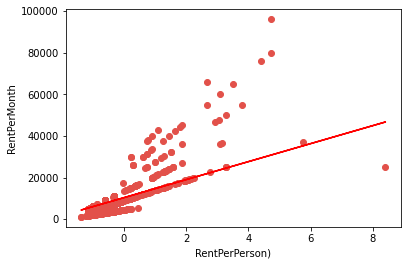

In [113]:
plt.scatter(X_train,y_train)
plt.plot(X_train ,  1.031e+04+4329.2371*X_train, 'r')
plt.xlabel('RentPerPerson)')
plt.ylabel('RentPerMonth')
plt.show()

The red line is the fitted line where the equation is Rent Per Person = y =1.031e+04+8084.8327 

In [106]:
y_train_pred = model.predict(X_train_lm)
resid = (y_train - y_train_pred)
resid

541    -514.583902
440     170.027588
482     -58.176242
422    3747.186272
778   -3774.638617
          ...     
106   -4149.382808
270    3868.795026
860    2652.707483
435     251.528956
102   -4114.822480
Name: RentPerMonth, Length: 700, dtype: float64

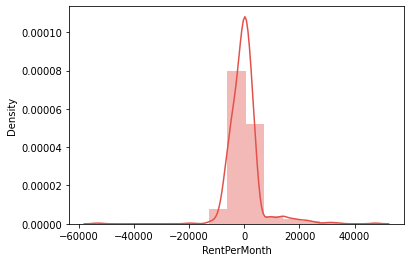

In [107]:
fig = plt.figure()
sns.distplot(resid,bins=15)
plt.show()

**INFERENCE:** The residuals are normally distributed.

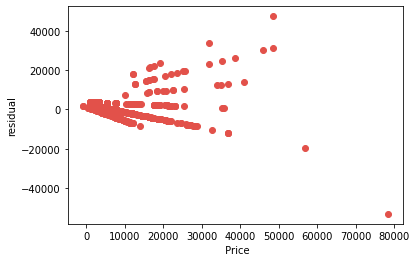

In [108]:
plt.scatter(y_train_pred,resid)
plt.xlabel(" Price")
plt.ylabel("residual")
plt.show()

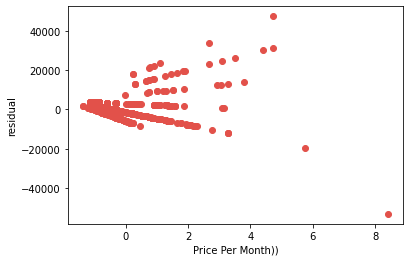

In [109]:
plt.scatter(X_train,resid)
plt.xlabel("Price Per Month))")
plt.ylabel("residual")
plt.show()

Text(0.5, 1.0, 'Normal Q-Q Plot')

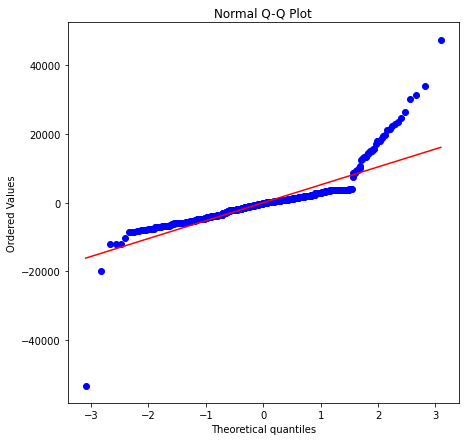

In [110]:
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

**Predicting using the test dataset.**

In [111]:
X_test_lm = lm.add_constant(X_test)
y_test_pred = model.predict(X_test_lm)
y_test_pred.astype(int)

array([ 7766, 14292, 14622, 11318,  2232, 11814,  5493,  3444, 13796,
        8840, 18752,  1081,  5536, 22717, 12805, 19853,  3950, 17651,
       15448,  1572,  8179, 10082,  5105,  7854, 10789, 11483,  7743,
       39237, 32712, 14787, 14054,  8840, 10162,  7188,  5040, 10492,
       11979,  9005, 32464,  5536,  1681,  1571,  4490, 23047,  4214,
       12144, 16026,  9501,  6270, 20404,  8840, 27673, 12111,  8840,
        2939,  3884,  9927,  1241,  3355, 12144,  4214,  5166,  8014,
       10789,  9666, 12144, 11318, 10492,  6197,  8014,  8060,  7023,
        9170, 14622,  4214,  4214, 11222,  4214,  9170,  4380, 11814,
        6197, 12144,  6197,  4545,  8179, 45184, 12970, 15448,  1681,
        5206,  6362,  7766,  3306, 17100,  6159, 15448,  1429,  5734,
       12144, 13466,  4875, 12805, 11880,  5536, 10709,  8344, 17100,
        2796, 22056,  7973, 12144, 36924, 19578,  7188,  6032, 10396,
       19027,  8014,  4214, 18201,  2452, 12970, 12098,  3554,  8510,
        8989,  6362,

An R-squared value of 0.658 indicates that the independent variable(s) in a regression model explain 65% of the variability in the dependent variable. 

In [112]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6583603390019014

#CONCLUSION:
 
 An R-squared value of 0.658 indicates that 65.8% of the variance in the dependent variable can be explained by the independent variable. This is a high R-squared value, which suggests a strong relationship between X and Y

A mean squared error (MSE) of 0.1607925363576144 suggests that on average, the model's predictions are off by 0.16 units of the dependent variable 

In conclusion, the high R-squared value and relatively low MSE suggest that the simple linear regression model is a good fit for the data and provides a strong relationship between X and Y.